<a href="https://colab.research.google.com/github/Untick/Selector_ObjDet/blob/Trokhachev-Anton-folder/Trokhachev%20Anton/%D0%A2%D1%80%D0%BE%D1%85%D0%B0%D1%87%D0%B5%D0%B2_%D0%90%D0%BD%D1%82%D0%BE%D0%BD_%D0%B3%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B4%D0%B0%D1%87%D0%B8_%D0%B2_%D0%9D%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pillow==9.4.0
import PIL

In [2]:
import PIL 
from PIL import Image 
print(PIL.__version__)
from matplotlib import pyplot as plt
import numpy as np
import gdown
import os

In [3]:
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_Selector_newbies/datasets/processed%20extended%20dataset%203.zip', None, quiet=True)

'processed%20extended%20dataset%203.zip'

In [4]:
!unzip -qq -o processed%20extended%20dataset%203.zip -d dataset/

In [5]:
import re

path = 'dataset/processed extended dataset 3' #>>>прописать путь до каталога с каталогами одежды
path_to = 'dataset_new3'

pattern = '.*(?=\.)'
dir_list = os.listdir(path)
if not os.path.isdir(path_to):
     os.mkdir(path_to)
for i in dir_list:
    if not os.path.isdir(f'{path_to}/{i}'):
        os.mkdir(f'{path_to}/{i}')
    fl = os.listdir(f'{path}/{i}')
    for i2 in fl:   #>>>Если нужна неполная версия датасета, заменяем на fl[:50] для 50 файлов в каждом каталоге
        fn = re.match(pattern, i2)
        img = f'{path}/{i}/{i2}'
        try:
            im = Image.open(img).convert("RGB")
        except:
            print(f'При обработке файла {i}/{i2} произошла ошибка. Файл не читается.')
            pass
        if not os.path.isfile(f'{path_to}/{i}/{fn.group(0)}.jpg'):
            im.save(f'{path_to}/{i}/{fn.group(0)}.jpg', 'jpeg')
        else:
            im.save(f'{path_to}/{i}/{fn.group(0)}ren545.jpg', 'jpeg')
        im.close()
        os.remove(f'{path}/{i}/{i2}')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


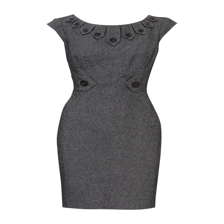

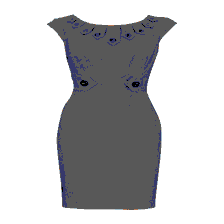

[63.74960140306123, 0.22520727040816327, 0.390625, 32.65704719387755, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01992984693877551, 0.0, 0.24912308673469388, 0.0, 0.0, 2.62874681122449, 0.0, 0.0, 0.07971938775510204]


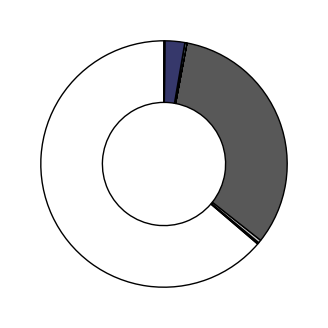

In [9]:
color_map =   {(255, 255, 255) : 0,  #белый
               (0, 0, 0) : 0,        #черный
               (195, 195, 195) : 0,  #серый
               (88, 88, 88) : 0,     #темно-серый
               (136, 0, 27) : 0,     #бордовый
               (236, 28, 36) : 0,    #красный
               (255, 127, 39) : 0,   #оранжевый
               (255, 202, 24) : 0,   #золотистый
               (253, 236, 166) : 0,  #бежевый
               (255, 242, 0) : 0,    #желтый
               (255, 228, 116) : 0,  #циплячий
               (169, 255, 14) : 0,   #салатовый
               (14, 209, 69) : 0,    #изумрудный
               (59, 151, 84) : 0,    #травянистый
               (92, 99, 65) : 0,     #хаки
               (140, 255, 251) : 0,  #небесно-голубой
               (158, 187, 201) : 0,  #серо-голубой
               (0, 168, 243) : 0,    #бирюзовый
               (63, 72, 204) : 0,    #синий
               (54, 56, 107) : 0,    #темно-синий
               (184, 61, 186) : 0,   #фуксия
               (255, 174, 200) : 0,  #розовый
               (185, 122, 86) : 0,}  #коричневый

palettedata = []

for color in color_map:
    palettedata.append(color[0])
    palettedata.append(color[1])
    palettedata.append(color[2])

patch_img = "dataset_new3/dress  business/116 (3).jpg"
#patch_img = "123321.png"

#print(palettedata)

palimage = Image.new('P', (1, 1))
palimage.putpalette(palettedata)
newimage = Image.open(patch_img).resize((224, 224)).convert("RGB").quantize(colors=23, method=2, kmeans=0, palette=palimage, dither=Image.NONE,).convert("RGB")
newimage2 = Image.open(patch_img).convert("RGB").resize((224, 224))
display(newimage2, newimage)
width, height = newimage.size
pixel_values = list(newimage.getdata())
pixel_values = np.array(pixel_values).reshape((width * height, 3))

#print(pixel_values)

for color in pixel_values:
  color_map[color[0], color[1], color[2]] += 1

color_list = []    
    
for key, value in color_map.items():
    color_list.append(value / (width * height) * 100)
print(color_list)

data = color_list

colors = []
for key, value in color_map.items():
    col = key[0] / 255, key[1] / 255, key[2] / 255
    colors.append(col)

# Creating plot
fig = plt.figure(figsize =(4, 4))
plt.pie(data, colors = colors, wedgeprops=dict(width=0.5, edgecolor='black'), startangle=90)

# show plot
plt.show()
